## Working with categorical inputs in sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read in the data 

Use the example data set from Week 11.

In [2]:
data_url = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2020/master/week_11/week_11_example_data.csv'
df = pd.read_csv(data_url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
 2   x3      300 non-null    float64
 3   x4      300 non-null    float64
 4   x5      300 non-null    object 
 5   y       300 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 14.2+ KB


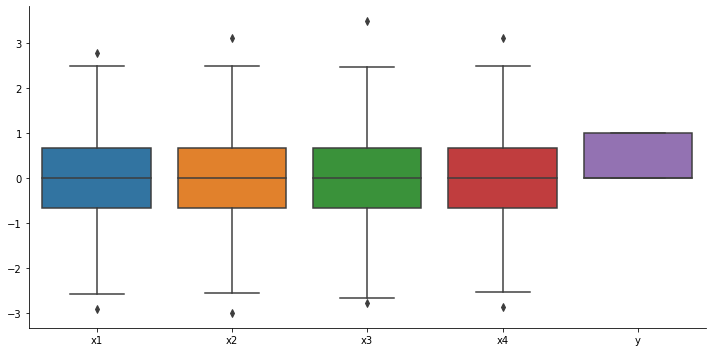

In [4]:
sns.catplot(data = df, kind='box', aspect=2)

plt.show()

## Fit a logistic regression model with a discrete input

Use stasmodels as a review.

In [5]:
import statsmodels.formula.api as smf

In [6]:
stats_fit = smf.logit( formula = 'y ~ x1 + x2 + x3 + x4 + x5', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.588229
         Iterations 5


In [7]:
print( stats_fit.summary() )

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            6
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                 0.08238
Time:                        01:22:25   Log-Likelihood:                -176.47
converged:                       True   LL-Null:                       -192.31
Covariance Type:            nonrobust   LLR p-value:                 1.876e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6745      0.254     -2.653      0.008      -1.173      -0.176
x5[T.b]       -0.2898      0.314     -0.922      0.357      -0.906       0.326
x5[T.c]        0.3100      0.354      0.876      0.3

Look at the design matrix to see the dummy variables.

In [8]:
from patsy import dmatrices

In [9]:
ydmat, Xdmat = dmatrices( 'y ~ x1 + x2 + x3 + x4 + x5', df)

In [10]:
pd.DataFrame( Xdmat, columns=stats_fit.params.index )

,Intercept,x5[T.b],x5[T.c],x1,x2,x3,x4
0,1.0,0.0,1.0,1.077412,-0.991094,0.208610,-1.019744
1,1.0,1.0,0.0,-0.637747,-0.307506,-1.794250,1.189993
2,1.0,1.0,0.0,1.345143,-1.075281,1.685044,0.167879
3,1.0,1.0,0.0,1.659924,0.735156,-0.210541,-2.534105
4,1.0,1.0,0.0,1.182378,1.599140,-0.301995,1.206648
...,...,...,...,...,...,...,...
295,1.0,0.0,1.0,1.239739,1.572756,0.610548,1.402896
296,1.0,0.0,1.0,-0.528292,3.120873,0.357688,-0.599724
297,1.0,1.0,0.0,0.256334,1.293508,0.023925,-0.996928
298,1.0,1.0,0.0,-0.628451,0.373513,0.038140,2.197234


If we wanted to fit in sklearn, we would want to **NOT** use the intercept column of ones. So instead of using dummy variables we would **one-hot encoding**.

In [11]:
ysk, Xsk = dmatrices( 'y ~ x1 + x2 + x3 + x4 + x5 - 1', df)

In [12]:
pd.DataFrame( Xsk )

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,1.077412,-0.991094,0.208610,-1.019744
1,0.0,1.0,0.0,-0.637747,-0.307506,-1.794250,1.189993
2,0.0,1.0,0.0,1.345143,-1.075281,1.685044,0.167879
3,0.0,1.0,0.0,1.659924,0.735156,-0.210541,-2.534105
4,0.0,1.0,0.0,1.182378,1.599140,-0.301995,1.206648
...,...,...,...,...,...,...,...
295,0.0,0.0,1.0,1.239739,1.572756,0.610548,1.402896
296,0.0,0.0,1.0,-0.528292,3.120873,0.357688,-0.599724
297,0.0,1.0,0.0,0.256334,1.293508,0.023925,-0.996928
298,0.0,1.0,0.0,-0.628451,0.373513,0.038140,2.197234


Fit a logistic regression model with sklearn.

In [13]:
from sklearn.linear_model import LogisticRegression

When we fit with the one-hot encoding in sklearn, we should set `fit_intercept` to False.  

**Important**: if we were fitting a model with only continuous variables, and we created the design matrix with `dmatrices()` and we did not include the intercept column of ones (by including the the `-1` term in the formula), we would set `fit_intercept=True` in the sklearn call.  

In this application, we will set `fit_intercept=False` because of the one-hot encoding.

Also, note that the `penalty` argument is set to `False`.

In [14]:
sk_fit_mle = LogisticRegression(penalty='none', solver='lbfgs', fit_intercept=False).fit(Xsk, ysk.ravel())

As a check, let's confirm that the intercpept was **not** fit and is equal to zero.

In [15]:
sk_fit_mle.intercept_

array([0.])

Let's now directly compare the statsmodels coefficient estimates with the sklearn estimates. Note that the DataFrame index is labeled as `Intercept` for the zeroth row. That is true for the statsmodels coefficient, but the sklearn coefficient is actually the one-hot encoding column associated with `x5='a'`. Notice that they have the same coefficient value! Because they have the same interpretation! The coefficients associated with `x5='b'` and `x5='c'` however are different. That is due to dummy variables are the **relative** effect compared to the reference level stored in the intercept. While the one-hot encoding formulation is estimate associated with that category.

In [16]:
pd.DataFrame({'statsmodels': stats_fit.params,
             'sklearn_no_penalty': list(sk_fit_mle.coef_.ravel())})

,statsmodels,sklearn_no_penalty
Intercept,-0.674470,-0.674465
x5[T.b],-0.289844,-0.964304
x5[T.c],0.310042,-0.364434
x1,0.310394,0.310406
x2,-0.579591,-0.579577
x3,0.113856,0.113846
x4,-0.048754,-0.048760


## Create the dummy variables with Pandas

Use the `pd.get_dummies()` function to create the dummy variables or the one-hot encoding from the Pandas dataframe.

In [17]:
### extract the input and output features
xinput = df.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']].copy()

youtput = df.loc[:, ['y']].copy()

Create the one-hot encoding with Pandas.

In [18]:
xfeatures_onehot = pd.get_dummies(xinput)

First, examine the input feature DataFrame. Look at the `x5` column values.

In [19]:
xinput

,x1,x2,x3,x4,x5
0,1.077412,-0.991094,0.208610,-1.019744,c
1,-0.637747,-0.307506,-1.794250,1.189993,b
2,1.345143,-1.075281,1.685044,0.167879,b
3,1.659924,0.735156,-0.210541,-2.534105,b
4,1.182378,1.599140,-0.301995,1.206648,b
...,...,...,...,...,...
295,1.239739,1.572756,0.610548,1.402896,c
296,-0.528292,3.120873,0.357688,-0.599724,c
297,0.256334,1.293508,0.023925,-0.996928,b
298,-0.628451,0.373513,0.038140,2.197234,b


Next, look at the additional *augmented* features associated with the one-hot encoding of the `x5` categorical variable.

In [20]:
xfeatures_onehot

,x1,x2,x3,x4,x5_a,x5_b,x5_c
0,1.077412,-0.991094,0.208610,-1.019744,0,0,1
1,-0.637747,-0.307506,-1.794250,1.189993,0,1,0
2,1.345143,-1.075281,1.685044,0.167879,0,1,0
3,1.659924,0.735156,-0.210541,-2.534105,0,1,0
4,1.182378,1.599140,-0.301995,1.206648,0,1,0
...,...,...,...,...,...,...,...
295,1.239739,1.572756,0.610548,1.402896,0,0,1
296,-0.528292,3.120873,0.357688,-0.599724,0,0,1
297,0.256334,1.293508,0.023925,-0.996928,0,1,0
298,-0.628451,0.373513,0.038140,2.197234,0,1,0


Check the counts associated with the unique values of `x5`.

In [21]:
xinput.x5.value_counts()

b    150
c     75
a     75
Name: x5, dtype: int64

There are 75 rows associated with the `x5='a'`. Next, look at the counts associated with the unique values of `x5_a` from the one-hot encoded feature array. Notice that there are just two values, 0 and 1. A value of 1 corresponds to `x5='a'`, while a value of 0 corresponds to `x5` **not** equaling `'a'`. Notice that below `x5_a=1` 75 times!

In [22]:
xfeatures_onehot.x5_a.value_counts()

0    225
1     75
Name: x5_a, dtype: int64

To use the dummy variable approach, we tell `pd.get_dummies()` to drop the reference level.

In [23]:
xfeatures_dummy = pd.get_dummies(xinput, drop_first=True)

Notice how with the dummy variable approach there are just 2 additional *augmented* features.

In [24]:
xfeatures_dummy

,x1,x2,x3,x4,x5_b,x5_c
0,1.077412,-0.991094,0.208610,-1.019744,0,1
1,-0.637747,-0.307506,-1.794250,1.189993,1,0
2,1.345143,-1.075281,1.685044,0.167879,1,0
3,1.659924,0.735156,-0.210541,-2.534105,1,0
4,1.182378,1.599140,-0.301995,1.206648,1,0
...,...,...,...,...,...,...
295,1.239739,1.572756,0.610548,1.402896,0,1
296,-0.528292,3.120873,0.357688,-0.599724,0,1
297,0.256334,1.293508,0.023925,-0.996928,1,0
298,-0.628451,0.373513,0.038140,2.197234,1,0


If we would use the dummy variable approach with sklearn, we would need to set the `fit_intercept` argument to `True`.

Let's now confirm we can replicate the sklearn coefficient estimates when we use the one-hot and dummy augmented features from Pandas. Two models are fit below, the first uses the one-hot encoding features, while the second uses the dummy variable features. Notice how with the one-hot encoding setup, `fit_intercept` is `False`, while with the dummy variable approach `fit_intercept=True`.

In [25]:
sk_fit_onehot = LogisticRegression(penalty='none', solver='lbfgs', fit_intercept=False).fit(xfeatures_onehot.to_numpy(), youtput.to_numpy().ravel())

In [26]:
sk_fit_dummy = LogisticRegression(penalty='none', solver='lbfgs', fit_intercept=True).fit(xfeatures_dummy.to_numpy(), youtput.to_numpy().ravel())

The Pandas creates one-hot and dummy *augmented* features are positioned at the end of the DataFrame. The one-hot and dummy *augmented* features created by `dmatrices()` are at the beginning of the design matrix. Thus, we need to reorder the coefficient estimates in order to properly compare them to what we estimated previously. The cell below manually defines the reordering for simplicity.

In [27]:
dummy_order = [4, 5, 0, 1, 2, 3]

onehot_order = [4, 5, 6, 0, 1, 2, 3]

And now perform the reordering using the `np.take()` function to take specific elements from a NumPy array.

In [28]:
onehot_coefs = np.take(sk_fit_onehot.coef_.ravel(), onehot_order)

dummy_coefs = np.take(sk_fit_dummy.coef_.ravel(), dummy_order)

We can now compare the coefficients across all 4 models we fit. As shown below, the continuous feature coefficients are the same (within rounding). The fit from the statsmodels with the formula api (which includes the intercept column of 1s) is the same (within rounding) as the sklearn model that had the Pandas created input features using the dummy variable formulation. The sklearn fit with the one-hot encoded features from dmatrices (intercept column of 1s removed) and the Pandas created one-hot encoded features are also teh same (within rounding).

In [29]:
pd.DataFrame({'statsmodels': stats_fit.params,
              'sklearn_no_penalty_with_dummy': list(sk_fit_dummy.intercept_) + list(dummy_coefs),
             'sklearn_no_penalty_from_dmatrices': list(sk_fit_mle.coef_.ravel()),
             'sklearn_no_penalty_with_onehot': list(onehot_coefs)})

,statsmodels,sklearn_no_penalty_with_dummy,sklearn_no_penalty_from_dmatrices,sklearn_no_penalty_with_onehot
Intercept,-0.674470,-0.674477,-0.674465,-0.674465
x5[T.b],-0.289844,-0.289849,-0.964304,-0.964304
x5[T.c],0.310042,0.310028,-0.364434,-0.364434
x1,0.310394,0.310397,0.310406,0.310406
x2,-0.579591,-0.579592,-0.579577,-0.579577
x3,0.113856,0.113863,0.113846,0.113846
x4,-0.048754,-0.048754,-0.048760,-0.048760
